Trajectory computation

From Saturn to Jupiter:


Semi-major axis of "circular orbit of the planets" in AU (in this case equal to r_s distance from the Sun)


In [ ]:
r_s = 9.555  #AU
r_j = 5.203  #AU

Semi-major axis of the Hohmann transfer:

In [ ]:
a_t = (r_s + r_j)/2
a_t

7.379

The perihelium of the trajectory is given by r_j = a_t⋅(1-ϵ) and the aphelium is given by r_s = a_t⋅(1+ϵ), so we can find the eccentricity of the transfer orbit by


In [ ]:
epsilont = (r_s-r_j)/(r_s+r_j)
epsilont

0.2948909066269142

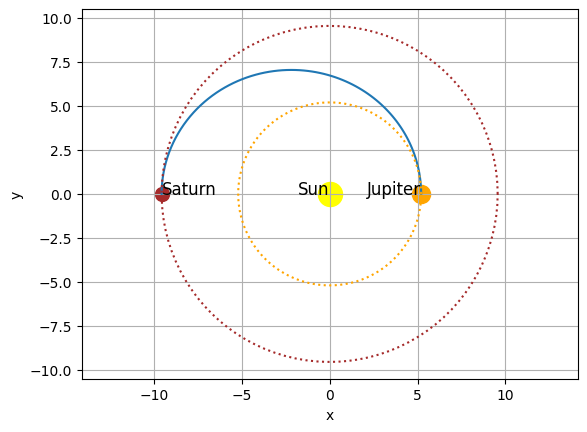

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of theta values
thetas = np.linspace(0, np.pi, 100)
pthetas = np.linspace(0, 2*np.pi, 100)

# Define the polar equation for an ellipse
r_function = lambda theta: (a_t * (1 - epsilont**2)) / (1 + epsilont * np.cos(theta))

# Compute the r values for each theta
r_values = list(map(r_function, thetas))

x_values = r_values * np.cos(thetas)
y_values = r_values * np.sin(thetas)

# Compute circular orbit of Saturn
x_valuesS = r_s * np.cos(pthetas)
y_valuesS = r_s * np.sin(pthetas)

# Compute circular orbit of Saturn
x_valuesJ = r_j * np.cos(pthetas)
y_valuesJ = r_j * np.sin(pthetas)

# Plot the ellipse in Cartesian coordinates
plt.plot(x_values, y_values, label='Ellipse')

# Plot the circular orbits
plt.plot(x_valuesJ , y_valuesJ, color='orange', linestyle='dotted', label="Jupiter's Orbit")
plt.plot(x_valuesS , y_valuesS, color='brown', linestyle='dotted', label="Saturn's Orbit")

# Plot the Sun at the focus
plt.scatter(0, 0, color='yellow', s=300, label='Sun')

# Plot Jupiter at periapsis
plt.scatter(r_j, 0, color='orange', s=170, label='Jupiter')

# Plot Saturn at apoapsis
plt.scatter(-r_s, 0, color='brown', s=100, label='Saturn')

# Annotate the points
plt.text(0, 0, 'Sun', fontsize=12, ha='right')
plt.text(r_j, 0, 'Jupiter', fontsize=12, ha='right')
plt.text(-r_s, 0, 'Saturn', fontsize=12, ha='left')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')  # Ensure the aspect ratio is equal to get a proper ellipse shape
plt.grid(True)
plt.show()